In [1]:
import numpy as np

import matplotlib.pyplot as plt


from latent_geometry.solver.exponential import IVPExponentialSolver
from latent_geometry.solver.logarithm import BVPLogarithmSolver
from latent_geometry.path import Path


In [2]:
log_solver = BVPLogarithmSolver(n_mesh_nodes=2)
exp_solver = IVPExponentialSolver()


In [209]:
START_THETA = 0.0
LIM = 1.5
N_PLOT_POINTS = 10
X_PENALTY_MULT = 10.0


In [210]:
def circle_vector(x, v):
    v_proj_on_x = x * np.dot(x, v) / np.linalg.norm(v) / np.linalg.norm(x)
    v_proj_perp = v - v_proj_on_x
    return -x * np.linalg.norm(v_proj_perp) ** 2


def x_displacement_correction(x, v):
    return x / np.linalg.norm(x) - x


def acceleration_fun(x, v):
    circle_term = circle_vector(x, v)
    x_penalty = x_displacement_correction(x, v)
    return circle_term - x_penalty * X_PENALTY_MULT


In [211]:
def draw_circle(radius, ax):
    circle_xs = np.cos(np.linspace(0.0, 2 * np.pi, 100)) * radius
    circle_ys = np.sin(np.linspace(0.0, 2 * np.pi, 100)) * radius
    ax.plot(circle_xs, circle_ys, color="black")


In [212]:
def draw_vector(vec: np.ndarray, pos: np.ndarray, ax, color, scale: float = 1.0):
    arrow = plt.arrow(
        pos[0],
        pos[1],
        vec[0] * scale,
        vec[1] * scale,
        color=color,
        width=0.01,
        head_width=0.05,
        alpha=0.15,
    )
    ax.add_patch(arrow)


def draw_path(
    path: Path, ax, vel: bool = False, acc: bool = False, n_points: int = N_PLOT_POINTS
):
    xs, vs, accs = path.get_moments(n_points)
    ax.scatter([x[0] for x in xs], [x[1] for x in xs], label=f"{path.length=:.2f}")

    if vel:
        for x, v in zip(xs, vs):
            draw_vector(v, x, ax, color="blue", scale=0.1)

    if acc:
        for x, a in zip(xs, accs):
            draw_vector(a, x, ax, color="purple", scale=0.03)


In [213]:
def plot(paths: list[Path]):
    fig, ax = plt.subplots(figsize=(9, 9))
    ax.set_ylim(-LIM, LIM)
    ax.set_xlim(-LIM, LIM)
    ax.axvline(x=0, color="black", linestyle="--")
    ax.axhline(y=0, color="black", linestyle="--")

    for path in paths:
        draw_path(path, ax, True, True)

    draw_circle(1.0, ax)
    ax.legend()
    plt.show()


In [214]:
def create_log_path(finish_theta, acc_fun) -> Path:
    x_start = np.array([np.cos(START_THETA), np.sin(START_THETA)])
    x_finish = np.array([np.cos(finish_theta), np.sin(finish_theta)])
    path = log_solver.find_path(x_start, x_finish, acc_fun)
    return path


def create_exp_path(length: float, acc_fun) -> Path:
    x_start = np.array([np.cos(START_THETA), np.sin(START_THETA)])
    v_start = np.array([-np.sin(START_THETA), np.cos(START_THETA)]) * length
    path = exp_solver.mark_path(x_start, v_start, acc_fun)
    return path


In [215]:
thetas = np.array([0.7, 0.8, 0.9, 1.0]) * np.pi
paths = [
    create_log_path(theta, acceleration_fun) for theta in thetas
]  # + [create_exp_path(theta) for theta in thetas]
print(thetas)


[2.19911486 2.51327412 2.82743339 3.14159265]


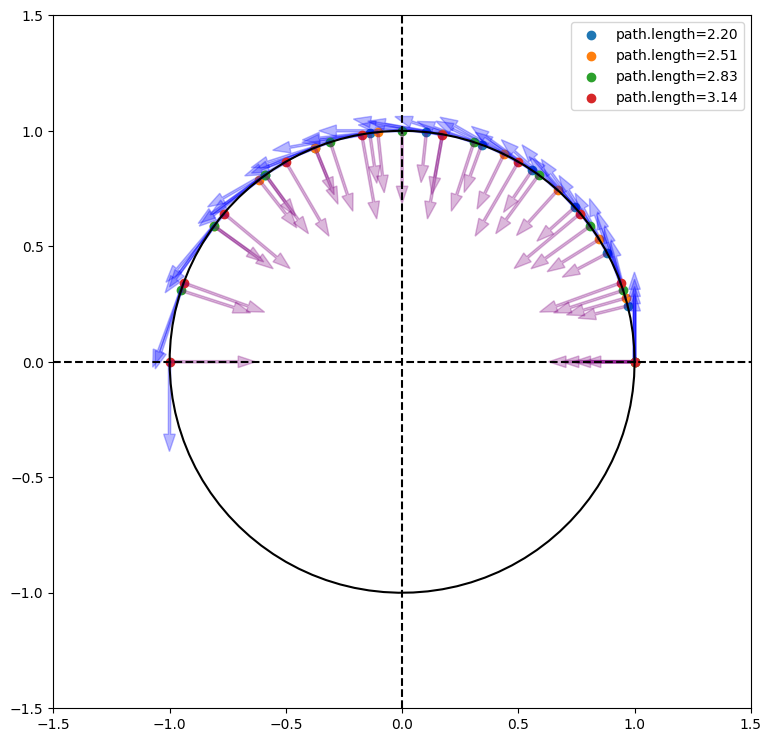

In [216]:
plot(paths)
